In [48]:
import subprocess
import shlex

In [49]:
import csb

In [50]:
def runHHblits( aln , name, path , outdir, db , iterations , ncores , runName='' , SS= False  , ohhm = False , verbose = True , Z = 2000 , B = 2000 , xargs = ''):
    if verbose == True:
        print( [aln , name, path , outdir, db , iterations , ncores , runName] )
    
    outhhr= outdir+name+runName+".hhr"
    args = path + ' -cpu '+ str(ncores) +' -d ' + db + ' -i ' + aln  +' -o '+ outhhr + ' -n ' + str(iterations) + ' -B '+ str(B) + ' -Z ' + str(Z) +' '+ xargs 
    if SS == True:
         args += ' -ssm 2 -ssw .5 '
    
    if ohhm == True:
        outa3m = outdir+name+runName+'.hhm'
        args += ' -ohhm ' + outa3m
    else: 
        outa3m = None
    if verbose == True:
        print(args)
    
    args = shlex.split( args)
    p = subprocess.run( args )
    return p , [outhhr,outa3m]


def runHHmake( aln , name, path = 'hhmake' , outdir='./', verbose = False, SS = False):
    if verbose == True:
        print( [aln , name, path , outdir] )
    outhhm= outdir+name+".hhm"
    args = path + ' -i '+  aln  +' -o '+ outhhm + ' -M 50'
    if SS == True:
        #todo : make ss prediction here
        pass
    args = shlex.split(args)
    print(args)
    p = subprocess.Popen(args )
    return p , [outhhm]

    

def hhrparse(hhr , coverage , proba ):
    profile = HHOutputParser(alignments=False).parse_file(hhr)
    qname = profile.query_name
    for hit in profile:
        proba = hit.probability
        i = hit.id

def query2PFAM_PDB(qaln, name , outdir= './' , path = 'hhblits' , verbose = False):
    uniclust = '/home/cactuskid13/mntpt/HHBLITsdb/uniclust30_2018_08/uniclust30_2018_08'
    pdb70 = '/home/cactuskid13/mntpt/HHBLITsdb/pdb70/pdb70'
    pfam = '/home/cactuskid13/mntpt/HHBLITsdb/pfam'
    
    db = uniclust
    iterations = 2
    ncores = 4
    
    runName = 'UNI'
    SS  = False
    oa3m = True
    
    p, ret = runHHblits( qaln ,name, path , outdir, db , iterations , ncores , runName , SS  , oa3m , verbose)
    p.wait()
    UNI_HHR = ret[0]
    '''
    #todo_add SS to model here
    
    db = pfam
    iterations = 1
    ncores = 1
    runName = 'PFAM'
    SS  = False
    oa3m = False
    qaln = ret[1]
    
    p, ret = runHHblits( qaln , name,  path , outdir, db , iterations , ncores , runName , SS  , oa3m , verbose)
    p.wait()
    PFAM_HHR = ret[1]
    
    
    db = pdb70
    iterations = 1
    ncores = 1
    runName = 'PDB'
    SS  = False
    oa3m = False
    
    p, ret = runHHblits( qaln ,name , path , outdir, db , iterations , ncores , runName , SS  , oa3m , verbose  )
    p.wait()
    PDB_HHR = ret[1]
    '''
    return UNI_HHR #, PDB_HHR , PFAM_HHR

def PFAM_HHR2GO(hhr):
    #map thru interpro
    
    pass

def PDB_HHR2GO(hhr):
    #map from pdb
    
    pass

def UNI_HHR2GO(hhr):
    #map from uniprot gaf
    
    #map to uniclust cluster rep and grab all identifiers
    
    #check if there are any annotations in cluster
    
    
    pass

In [51]:
import hhsuitedb as hhdb

In [52]:
#use struct align to find FSXA
#check with interpro Hap2 list for new entries
import urllib.parse
import urllib.request
from io import StringIO
import pandas as pd

def unirequest_tab(q):
    #this is shamelessly lifted from the uniprot programmatic access page
    url = 'https://www.uniprot.org/uniprot/'
    params = {
    'columns': 'id,entry name,reviewed,protein names,genes,organism,length',
    'format': 'tab',
    'query':q
    }
    
    data = urllib.parse.urlencode(params)
    data = data.encode('utf-8')
    req = urllib.request.Request(url, data)
    with urllib.request.urlopen(req) as f:
       response = f.read()
    r = response.decode('utf-8')
    return r    
q= 'database:(type:interpro hap2/gcs1)'
Hapdf = pd.read_table( StringIO(unirequest_tab(q)))
print(Hapdf)
#align FSXA and check struct

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


          Entry        Entry name      Status  \
0        B9G4M9       HAP2B_ORYSJ    reviewed   
1        Q5W6B9       HAP2A_ORYSJ    reviewed   
2        Q4YCF6        HAP2_PLABA    reviewed   
3        A7SIM4        HAP2_NEMVE    reviewed   
4    A0A060A682        HAP2_TETTH    reviewed   
5        A4GRC6        HAP2_CHLRE    reviewed   
6        F4JP36        HAP2_ARATH    reviewed   
7    A0A2P9DBU3  A0A2P9DBU3_PLARE  unreviewed   
8        E9ATG8      E9ATG8_LEIMU  unreviewed   
9    A0A1D3LJG0  A0A1D3LJG0_PLACH  unreviewed   
10       Q4N203      Q4N203_THEPA  unreviewed   
11   A0A2A9MH87  A0A2A9MH87_9APIC  unreviewed   
12       S9VHF0      S9VHF0_9TRYP  unreviewed   
13   A0A0J9SZ65  A0A0J9SZ65_PLAVI  unreviewed   
14   A0A086Q6X1  A0A086Q6X1_TOXGO  unreviewed   
15   A0A0J9SVX5  A0A0J9SVX5_PLAVI  unreviewed   
16   A0A151LJV6  A0A151LJV6_PLARE  unreviewed   
17   A0A2S2Q980  A0A2S2Q980_9HEMI  unreviewed   
18       E2AK58      E2AK58_CAMFO  unreviewed   
19   A0A2P4Z4K9  A0A

In [32]:
#lets search for new Hap2 homologues using the structurally guided MSA
import time
t0 = time.time()
structaln ='./structalnHap2.fasta'
p, output = runHHmake( structaln , 'structaln' , path = 'hhmake' , outdir='./', verbose = False, SS = False)
uniclust = '/home/cactuskid13/mntpt/HHBLITsdb/uniclust30_2018_08/uniclust30_2018_08'
p , output = runHHblits( output[0] , name = 'structaln' , path= 'hhblits ' , outdir = './' , db = uniclust , iterations= 3 , ncores = 8 , verbose = True , runName= 'findFsxA'  , xargs = ' -mact .5 ')
print( time.time() - t0)

['hhmake', '-i', './structalnHap2.fasta', '-o', './structaln.hhm', '-M', '50']
['./structaln.hhm', 'structaln', 'hhblits ', './', '/home/cactuskid13/mntpt/HHBLITsdb/uniclust30_2018_08/uniclust30_2018_08', 3, 8, 'findFsxA']
hhblits  -cpu 8 -d /home/cactuskid13/mntpt/HHBLITsdb/uniclust30_2018_08/uniclust30_2018_08 -i ./structaln.hhm -o ./structalnfindFsxA.hhr -n 3 -B 2000 -Z 2000  -mact .5 
125.87889003753662


In [58]:
#Any Hap2 homologues that don't have a PFAM domain might be worth considering
from csb.bio.io.hhpred import HHOutputParser
haps = set(Hapdf.Entry)
newhits = {}
results = HHOutputParser(alignments=False).parse_file(output[0]
for hit in results:
    if hit.id.split('|')[1].strip() not in haps:
        newhits.update( { hit.id.split('|')[1].strip() : { 'prob':hit.probability, 'len' : hit.length }}  )

In [59]:
import bioservices
#lets pull all the new hits from uniprot
uni = bioservices.uniprot.UniProt()
df = uni.get_df( newhits.keys() )

In [64]:
#we can assign an HHblits score to each hit
#adhoc score = len * proba

hhdf = pd.DataFrame.from_dict( newhits , orient = 'index')
df = df.merge( hhdf, how = 'left' , left_on = 'Entry' , right_index = True )
df['score'] = df['prob'] * df['len']
#sort the DF and print
print(df.sort_values( 'score' , ascending = False) )
#woohooo we have some nice hits in archaea!

          Entry        Entry name                 Gene names  \
3    A0A2P6VLN8  A0A2P6VLN8_9CHLO               [C2E20_2003]   
140  A0A1D5YQF5  A0A1D5YQF5_WHEAT                         []   
56   A0A077X8A7  A0A077X8A7_PLABA                         []   
190  A0A074T0R9  A0A074T0R9_HAMHA                         []   
47   A0A0R0EC69  A0A0R0EC69_SOYBN                         []   
70   A0A0L8ICF9  A0A0L8ICF9_OCTBM         [OCBIM_22023600mg]   
38       Q4U9A4      Q4U9A4_THEAN                  [TA09115]   
124  A0A1S3HIK2  A0A1S3HIK2_LINUN             [LOC106155596]   
69       B7Q4W2      B7Q4W2_IXOSC  [8035957 IscW_ISCW021642]   
160  A0A2C6LG11  A0A2C6LG11_9APIC              [CSUI_000472]   
62   A0A194PJ31  A0A194PJ31_PAPXU               [RR46_10691]   
121  A0A2A4JYK0  A0A2A4JYK0_HELVI               [B5V51_8069]   
101      A5ADU5      A5ADU5_VITVI            [VITISV_001267]   
39       S9ULB3      S9ULB3_9TRYP               [AGDE_17097]   
176  A0A0B5I0F2  A0A0B5I0F2_ARCG6       

In [65]:
#generate profiles for each type of fusexin
#these are hand selected known fusexins
import glob
queries = glob.glob('queries/*.fasta')
print(queries)
for q in queries:
    p,output = runHHblits(q , name = q.split('.')[0].split('/')[1] + 'Profphylo' , path= 'hhblits ' , outdir = './HHM_UNI/' , db = uniclust , iterations= 3 , ncores = 8 , ohhm = True, verbose = True , runName= 'test' , xargs = ' -mact .5')    

['queries/P22338.fasta', 'queries/WP_007110832.1.fasta', 'queries/A0A060A682.fasta', 'queries/G7YB21.fasta', 'queries/A0A0B5I0F2.fasta', 'queries/X6N9B2.fasta', 'queries/A2T090.fasta', 'queries/H2AM12.fasta', 'queries/C3Y7J9.fasta', 'queries/G5EGL9.fasta', 'queries/C0MMX3.fasta', 'queries/M9T5J2.fasta', 'queries/P33515.fasta', 'queries/Q8JPR1.fasta', 'queries/RLG94066.1.fasta', 'queries/RKX41251.1.fasta', 'queries/R9RW17.fasta', 'queries/Q02004.fasta', 'queries/W8CZ94.fasta', 'queries/Q85429.fasta', 'queries/P29990.fasta', 'queries/WP_058826362.1.fasta', 'queries/RKZ11204.1.fasta', 'queries/P06935.fasta', 'queries/G0YVK3.fasta', 'queries/A0A0B5KS44.fasta', 'queries/RLI53188.1.fasta', 'queries/A3RKP6.fasta', 'queries/D1FNM3.fasta', 'queries/T1ISJ2.fasta', 'queries/A0A0K2SR10.fasta', 'queries/D2VN83.fasta', 'queries/WP_049937247.1.fasta', 'queries/RLG58774.1.fasta', 'queries/F4JP36.fasta', 'queries/Q6X2U1.fasta', 'queries/D2VQ99.fasta', 'queries/P27395.fasta', 'queries/Q23869.fasta', 'qu

In [67]:
#make a db with HMMS
import hhsuitedb
hhsuitedb.add_new_files( './HHM_UNI/*.hhm' , "hhm" ,  'profilephylo_v2_hhm_db')

In [78]:
#run all v all comparison
hhms = glob.glob( 'HHM_UNI/*.hhm')
print(hhms)
for q in hhms:
    p,output = runHHblits(q , name = q.split('.')[0].split('/')[1] + 'allvall' , path= 'hhsearch ' , outdir = './ALLVSALL/' , db = './profilephylo_v2_hhm_db' , iterations= 1 , ncores = 8 , ohhm = False, verbose = True , runName= 'test' , xargs = ' -mact .5')

['HHM_UNI/RLG58774Profphylotest.hhm', 'HHM_UNI/G7YB21Profphylotest.hhm', 'HHM_UNI/G0YVK3Profphylotest.hhm', 'HHM_UNI/Q01260Profphylotest.hhm', 'HHM_UNI/RKX41251Profphylotest.hhm', 'HHM_UNI/M9T5J2Profphylotest.hhm', 'HHM_UNI/X6N9B2Profphylotest.hhm', 'HHM_UNI/P03315Profphylotest.hhm', 'HHM_UNI/P33515Profphylotest.hhm', 'HHM_UNI/T1ISJ2Profphylotest.hhm', 'HHM_UNI/D0A4L4Profphylotest.hhm', 'HHM_UNI/Q8JPR1Profphylotest.hhm', 'HHM_UNI/H2AM12Profphylotest.hhm', 'HHM_UNI/RLG94066Profphylotest.hhm', 'HHM_UNI/WP_058826362Profphylotest.hhm', 'HHM_UNI/F4JP36Profphylotest.hhm', 'HHM_UNI/D2VQ99Profphylotest.hhm', 'HHM_UNI/Q02004Profphylotest.hhm', 'HHM_UNI/P27395Profphylotest.hhm', 'HHM_UNI/A0A060A682Profphylotest.hhm', 'HHM_UNI/RLI53188Profphylotest.hhm', 'HHM_UNI/D2VN83Profphylotest.hhm', 'HHM_UNI/A0A0K2SR10Profphylotest.hhm', 'HHM_UNI/RKZ11204Profphylotest.hhm', 'HHM_UNI/W8CZ94Profphylotest.hhm', 'HHM_UNI/C3Y7J9Profphylotest.hhm', 'HHM_UNI/R9RW17Profphylotest.hhm', 'HHM_UNI/P13897Profphylotest.h

In [53]:
#parse hhr files and make dist kernel
#use Fastme to make a tree
import numpy as np
import networkx as nx
import os
import glob
from csb.bio.io.hhpred import HHOutputParser
import subprocess , shlex
import pickle
import tempfile
from ete3 import PhyloTree
import seaborn as sns

def runFastme( fastmepath , clusterfile ):
    args =  fastmepath +  ' -i ' + clusterfile + ' -o ' + clusterfile+'_tree.txt'
    print( args)
    p = subprocess.call(shlex.split(args) , stdout=subprocess.PIPE )
    return p,[clusterfile+'_tree.txt' ]

def distmat_to_txt( namelist , distmat, filedir , name):
    print( namelist)
    print( distmat.shape)
    outstr = str(len(pdblist)) + '\n'
    for i,pdb in enumerate(namelist):
        namestr = pdb[0:20]
        outstr += namestr+ ' ' + np.array2string( distmat[i,:], formatter={'float_kind':lambda x: "%.2f" % x} , precision = 8 ).replace('[', '').replace(']', '').replace('\n', '' )  + '\n'
    with open(filedir + name + 'fastmemat.txt' , 'w') as handle:
        handle.write(outstr)
    return filedir + name + 'fastmemat.txt' , filedir + name + 'phylipmat.txt'

def cleanID(ID):
    
    if '|PDBID' in ID:
        ID = ID.split('|PDBID')[0]
    
    if '|' in ID:
        ID = ID.split('|')[1]
    if '.' in ID:
        ID = ID.split('.')[0]
    if '/' in ID:
        ID = ID.split('/')[0]
    if 'hmmercut' in ID:
        ID = ID.split('hmmercut')[0]
    ID = ID.strip()
    return ID


def HHSearch_parseTo_DMandNX(hhrs ):
    clusternames = []
        
    for i,hhr in enumerate(hhrs):
        profile = HHOutputParser(alignments=False).parse_file(hhr)
        if profile.query_name not in clusternames:
            clusternames.append(cleanID(profile.query_name))
    print(clusternames)
    evalDM = np.ones( (len(clusternames),len(clusternames) ))
    pvalDM = np.ones( (len(clusternames),len(clusternames) ))
    scoreDM = np.zeros( (len(clusternames),len(clusternames) ))
    SSDM = np.zeros( (len(clusternames),len(clusternames) ))
    probaDM = np.zeros( (len(clusternames),len(clusternames) ))
    lenDM =  np.ones( (len(clusternames),len(clusternames) ))
    
    NX = nx.Graph()
    
    for i,hhr in enumerate(hhrs):
        protlist = []
        profile = HHOutputParser(alignments=False).parse_file(hhr)
        for hit in profile:
            DMscore = float(hit.evalue)
            proba = hit.probability
            if 'anchor' not in hit.id and 'anchor' not in profile.query_name:
                i = clusternames.index(cleanID(hit.id))
                j = clusternames.index(cleanID(profile.query_name))

                if hit.evalue < evalDM[i,j]:
                    evalDM[i,j] = hit.evalue
                    evalDM[j,i] = evalDM[i,j]

                if hit.pvalue < pvalDM[i,j]:
                    pvalDM[i,j] = hit.pvalue
                    pvalDM[j,i] = pvalDM[i,j]

                if scoreDM[i,j] < hit.score:
                    scoreDM[i,j] = hit.score
                    scoreDM[j,i] = scoreDM[i,j]

                if SSDM[i,j] < hit.ss_score:
                    SSDM[i,j] = hit.ss_score
                    SSDM[j,i] = SSDM[i,j]


                if probaDM[i,j] < hit.probability:
                    probaDM[i,j] = hit.probability
                    probaDM[j,i] = probaDM[i,j]

                #use smallest of the two prots
                if lenDM[i,j] == 1 or lenDM[i,j] > hit.qlength:
                    lenDM[i,j] = hit.qlength
                    lenDM[j,i] = lenDM[i,j]

            if hit.id != profile.query_name :
                NX.add_edge( hit.id , profile.query_name )
                NX[hit.id][profile.query_name]['score']= hit.score
    return probaDM, evalDM ,pvalDM,  lenDM , scoreDM, SSDM, NX , clusternames




['./ALLVSALL/Q85429Profphylotestallvalltest.hhr', './ALLVSALL/D1FNM3Profphylotestallvalltest.hhr', './ALLVSALL/Q6X2U1Profphylotestallvalltest.hhr', './ALLVSALL/A2T090Profphylotestallvalltest.hhr', './ALLVSALL/WP_049937247Profphylotestallvalltest.hhr', './ALLVSALL/G7YB21Profphylotestallvalltest.hhr', './ALLVSALL/A0A0K2SR10Profphylotestallvalltest.hhr', './ALLVSALL/D2VQ99Profphylotestallvalltest.hhr', './ALLVSALL/H2AM12Profphylotestallvalltest.hhr', './ALLVSALL/G5EGL9Profphylotestallvalltest.hhr', './ALLVSALL/D2W008Profphylotestallvalltest.hhr', './ALLVSALL/RKZ11204Profphylotestallvalltest.hhr', './ALLVSALL/RLG58774Profphylotestallvalltest.hhr', './ALLVSALL/RKX41251Profphylotestallvalltest.hhr', './ALLVSALL/P29990Profphylotestallvalltest.hhr', './ALLVSALL/Q23869Profphylotestallvalltest.hhr', './ALLVSALL/D2VN83Profphylotestallvalltest.hhr', './ALLVSALL/T1ISJ2Profphylotestallvalltest.hhr', './ALLVSALL/A0A0B5KS44Profphylotestallvalltest.hhr', './ALLVSALL/RLI53188Profphylotestallvalltest.hhr

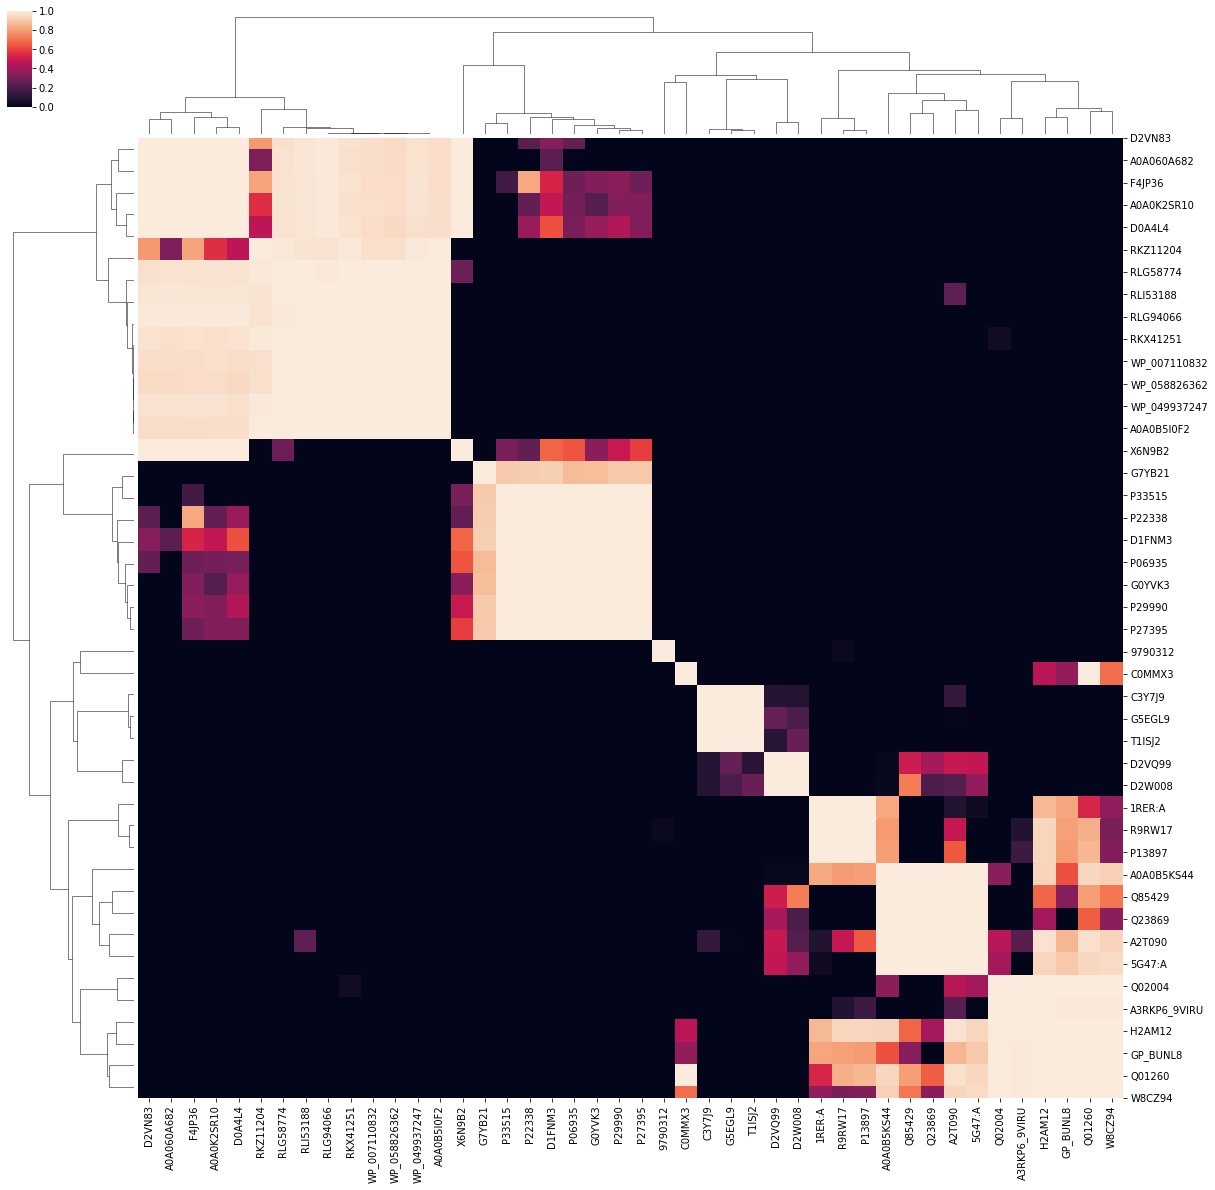

In [54]:
import seaborn as sns
print(glob.glob('./ALLVSALL/*.hhr'))
probaDM, evalDM ,pvalDM,  lenDM , scoreDM, SSDM, NX , clusternames = HHSearch_parseTo_DMandNX(glob.glob('./ALLVSALL/*.hhr'))

g = sns.clustermap( probaDM , xticklabels=clusternames  , yticklabels=clusternames , figsize = (20,20) )



In [76]:
q = 'id: F4JP36 OR H2AM12 OR G5EGL9 '
q = 'id:'+' OR '.join(clusternames)
print(q)
Hapdf = pd.read_table( StringIO(unirequest_tab(q)) )
print( Hapdf)



id:Q85429 OR D1FNM3 OR 9790312 OR A2T090 OR WP_049937247 OR G7YB21 OR A0A0K2SR10 OR D2VQ99 OR H2AM12 OR G5EGL9 OR D2W008 OR RKZ11204 OR RLG58774 OR RKX41251 OR P29990 OR Q23869 OR D2VN83 OR T1ISJ2 OR A0A0B5KS44 OR RLI53188 OR F4JP36 OR R9RW17 OR P27395 OR Q02004 OR A0A060A682 OR 1RER:A OR WP_007110832 OR GP_BUNL8 OR P13897 OR X6N9B2 OR 5G47:A OR C3Y7J9 OR A3RKP6_9VIRU OR Q01260 OR D0A4L4 OR G0YVK3 OR RLG94066 OR P06935 OR P22338 OR A0A0B5I0F2 OR C0MMX3 OR P33515 OR WP_058826362 OR W8CZ94


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


         Entry        Entry name      Status  \
0       Q85429         GLYC_RSVT    reviewed   
1       P33515         POLG_MCFA    reviewed   
2       P29990        POLG_DEN26    reviewed   
3       P27395        POLG_JAEV1    reviewed   
4       P22338          POLG_LIV    reviewed   
5       P05106        ITB3_HUMAN    reviewed   
6       P13897         POLS_WEEV    reviewed   
7       P06935          POLG_WNV    reviewed   
8       G5EGL9        AFF1_CAEEL    reviewed   
9   A0A060A682        HAP2_TETTH    reviewed   
10      H2AM12          GP_SBVBH    reviewed   
11      Q02004          GP_DUGBA    reviewed   
12      F4JP36        HAP2_ARATH    reviewed   
13      Q01260           GP_INSV    reviewed   
14      Q8JPR1          GP_BUNL8    reviewed   
15  A0A0B5KS44  A0A0B5KS44_9VIRU  unreviewed   
16  A0A496UNY3  A0A496UNY3_9BACT  unreviewed   
17      Q23869      Q23869_DICDI  unreviewed   
18      C3Y7J9      C3Y7J9_BRAFL  unreviewed   
19      R9RW17      R9RW17_CHIKV  unrevi

In [78]:
organisms = dict( zip ( Hapdf.Entry , Hapdf.Organism ) )


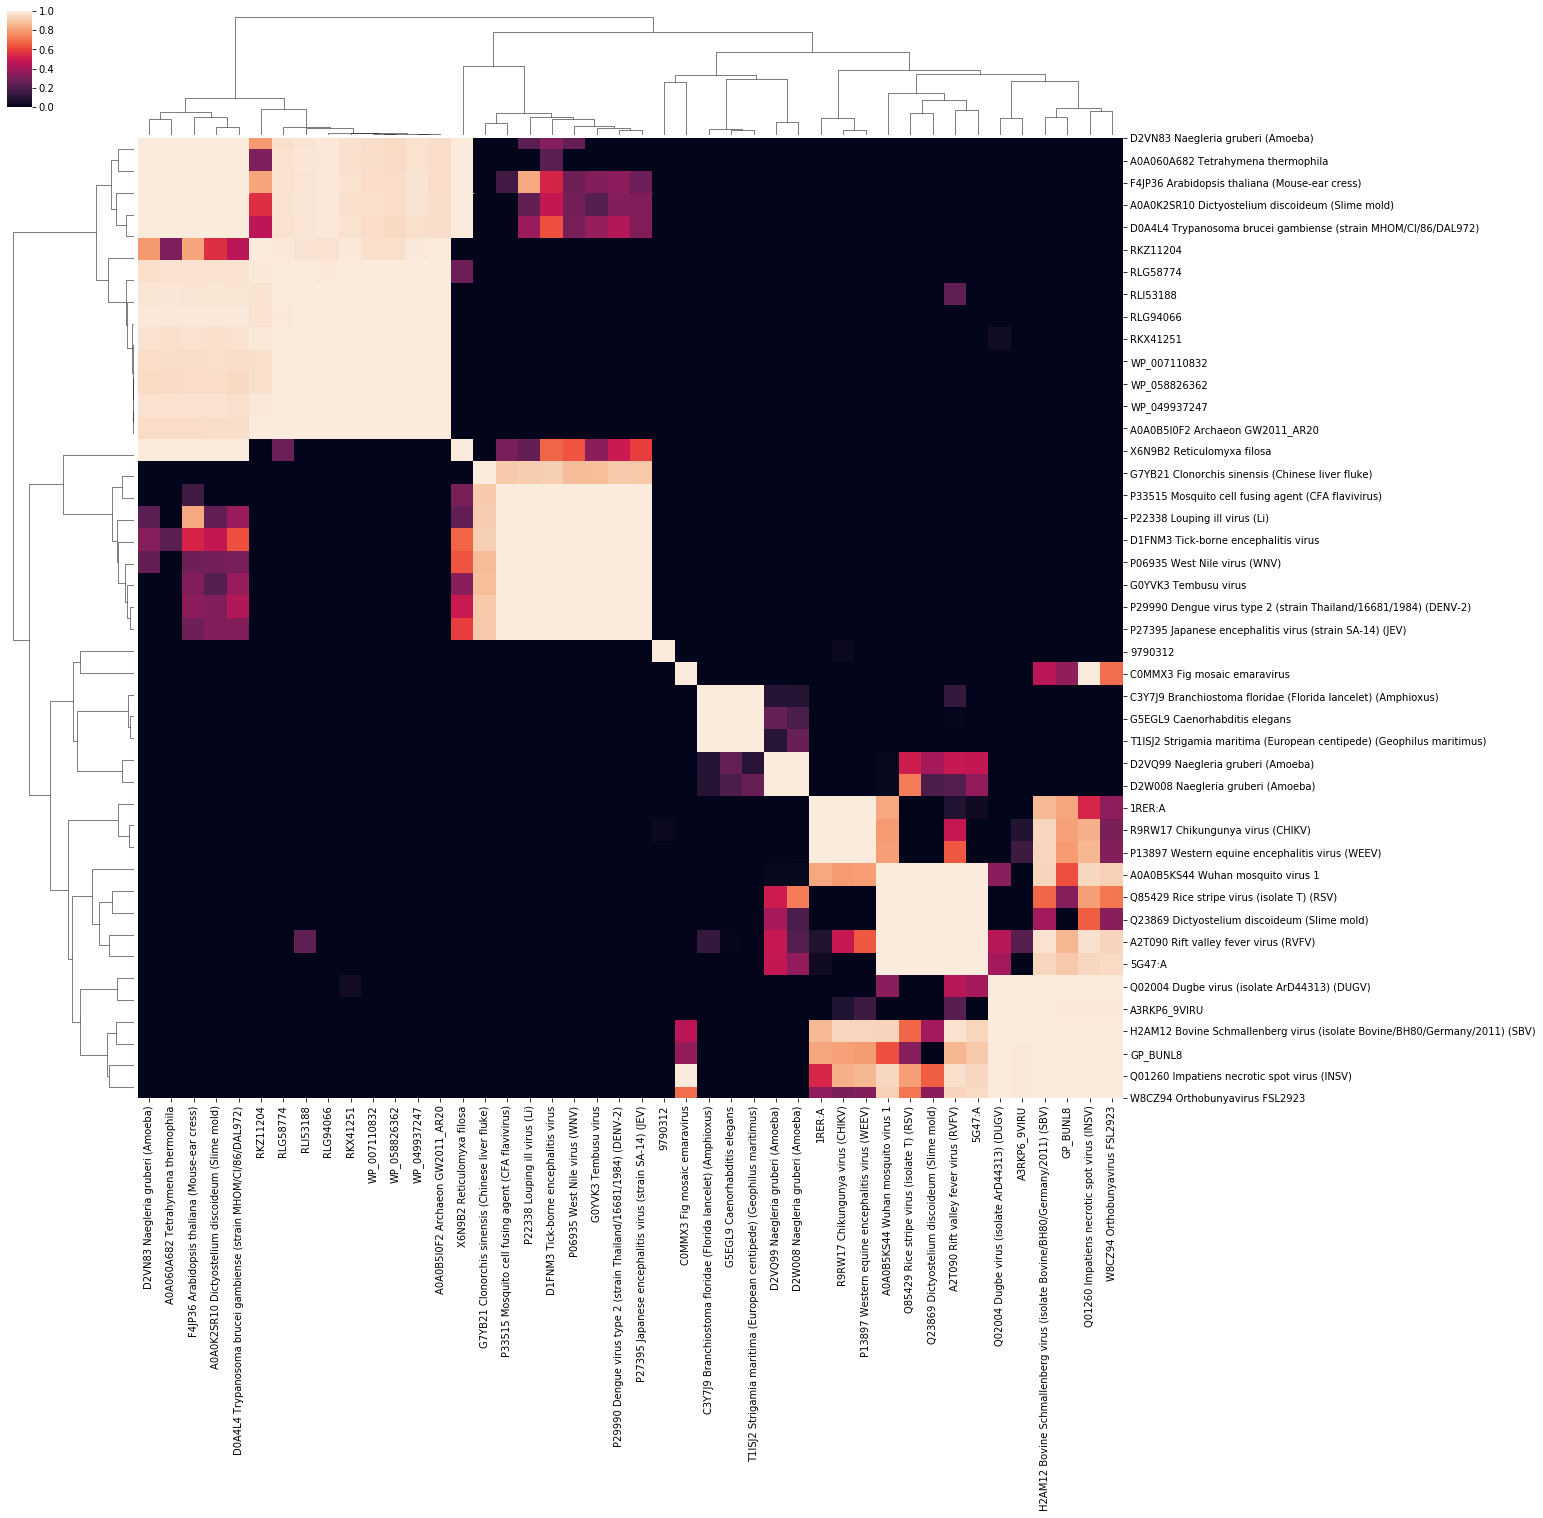

In [81]:
from io import StringIO
import pandas as pd

clusternamesWorga = [ c +' ' + organisms[c] if c in organisms else c for c in clusternames]
g = sns.clustermap( probaDM , xticklabels=clusternamesWorga  , yticklabels=clusternamesWorga , figsize = (20,20) )
g.savefig( 'profilephylo_fsxa.svg')